IMPORT LIB

In [650]:
import pandas as  pd    
import seaborn as sns
import numpy as np
import plotly.express as px 
import openpyxl
import matplotlib.pyplot as plt

IMPORT DATA, CLEANING AND EXPLO
---
>

In [651]:
df_survey=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/employee_survey_data.csv')
df_general=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/general_data.csv')
df_in_time=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/in_time.csv')
df_manager_survey=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/manager_survey_data.csv')
df_out_time=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/out_time.csv')
dictionary = pd.read_excel('/Users/kalou/Documents/GitHub/rh-analysis/archive/data_dictionary.xlsx')


EXPLO DATA

In [652]:
df_manager_survey

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [653]:
df_manager_survey.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

DF SURVEY

In [654]:
df_survey.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [655]:
df_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [656]:
df_survey_clean=df_survey.dropna()

DF GENERAL

In [657]:
df_general

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [658]:
df_general_survey = pd.merge(df_general, df_survey, on='EmployeeID', how='outer')


In [659]:
df_general_final = pd.merge(df_general_survey, df_manager_survey, on='EmployeeID', how='outer')


In [660]:
df_general_final.shape

(4410, 29)

In [661]:
df_general_final.dropna(subset=['EnvironmentSatisfaction','JobSatisfaction' ,'WorkLifeBalance'])

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [662]:
df_general_survey_clean=df_general_final.dropna(subset=['EnvironmentSatisfaction','JobSatisfaction' ,'WorkLifeBalance'])

In [663]:
df_general_explo = df_general_survey_clean.drop(columns=['Gender', 'Over18', 'EmployeeCount', 'StandardHours'])

In [664]:
df_all=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/df_all.csv')

In [665]:
def Apercentage(df,column_names):
    results = {}
    for column_name in column_names:
        values = df[column_name].unique()
        for column_value in values:
            yes_counts = df[df[column_name] == column_value]['Attrition'].value_counts().get('Yes', 0)
            total_counts = df[df[column_name] == column_value]['Attrition'].count()
            percentage_of_attrition = yes_counts / total_counts * 100

            results[column_value] = percentage_of_attrition
    
    return results


In [666]:

def Tpercentagev2(df, filter_column, filter_value, target_column):
    filtered_df = df[df[filter_column] == filter_value]
    value_counts = filtered_df[target_column].value_counts()
    total_count = filtered_df[target_column].count()
    percentages = (value_counts / total_count) * 100
    return percentages



In [667]:
def Tpercentage(df, filter_column, target_column):
    results = {}
    unique_values = df[filter_column].drop_duplicates()
    for value in unique_values:
        filtered_df = df[df[filter_column] == value]
        value_counts = filtered_df[target_column].value_counts()
        total_count = filtered_df[target_column].count()
        percentages = (value_counts / total_count) * 100
        results[value] = percentages
    return results





In [668]:
Tpercentagev2(df_all, 'JobRole','Research Scientist', 'JobSatisfaction')


JobSatisfaction
4.0    29.569267
3.0    28.637951
2.0    21.536671
1.0    20.256112
Name: count, dtype: float64

JOB ROLE EXPLO
---
>

In [669]:
JobRole = ['JobRole']
job=Apercentage(df_all,JobRole)
job

{'Healthcare Representative': 14.588859416445624,
 'Research Scientist': 18.39348079161816,
 'Sales Executive': 16.94560669456067,
 'Human Resources': 13.636363636363635,
 'Research Director': 22.97872340425532,
 'Laboratory Technician': 16.116248348745046,
 'Manufacturing Director': 11.374407582938389,
 'Sales Representative': 14.937759336099585,
 'Manager': 13.043478260869565}

In [670]:
df_all.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'TotalWorkingHours', 'AverageHoursPerDay',
       'NumberOfDaysAbsent', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [671]:
Tpercentagev2(df_all, 'JobRole','Research Scientist', 'JobInvolvement')


JobInvolvement
3    55.995343
2    27.706636
4     8.498254
1     7.799767
Name: count, dtype: float64

Text(0.5, 1.0, 'Attrition Rate by Job Role')

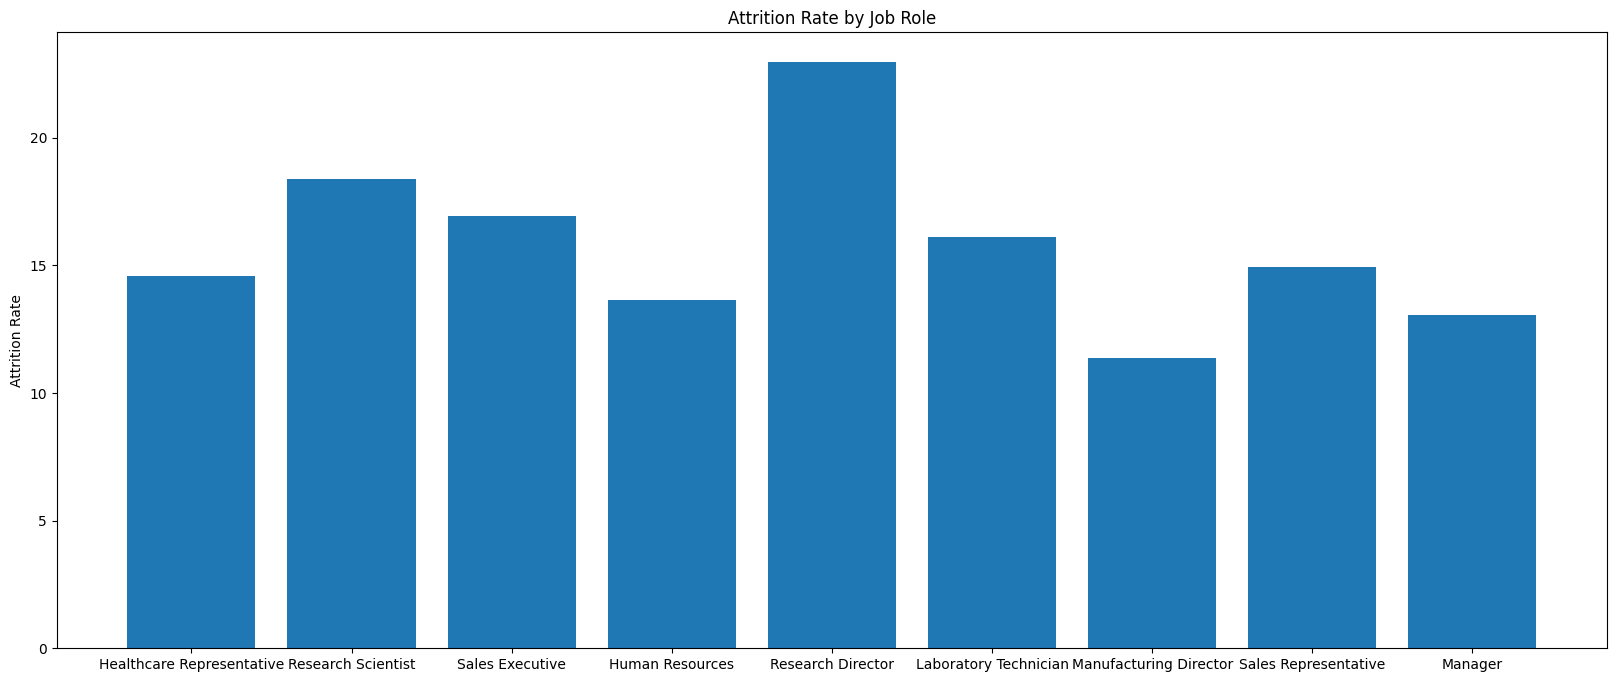

In [672]:
plt.figure(figsize=(20,8))
plt.bar(list(job.keys()), list(job.values()))
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Job Role')


In [673]:
df_all.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'TotalWorkingHours', 'AverageHoursPerDay',
       'NumberOfDaysAbsent', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')

In [674]:
df_all[df_all['JobRole'] == 'Research Scientist']['MonthlyIncome'].value_counts()


MonthlyIncome
173280    6
47790     6
34200     6
75250     3
27430     3
         ..
28000     2
23400     2
107980    2
23230     2
23730     1
Name: count, Length: 289, dtype: int64

In [675]:
df_all[df_all['JobRole'] == 'Research Director']['EnvironmentSatisfaction'].value_counts()


EnvironmentSatisfaction
4.0    78
3.0    68
2.0    47
1.0    42
Name: count, dtype: int64

DEPARTMENT EXPLO
---
>

In [676]:
Department = ['Department']
dep=Apercentage(df_all,Department)
dep

{'Sales': 15.14919663351186,
 'Research & Development': 15.781973637335234,
 'Human Resources': 29.03225806451613}

Text(0.5, 1.0, 'Attrition Rate by Department')

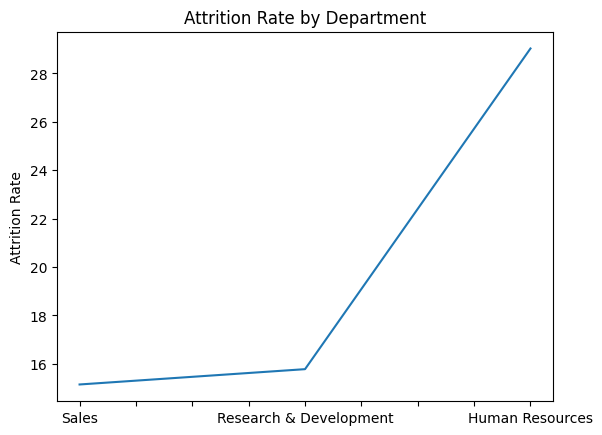

In [677]:
pd.Series(dep).plot()  
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Department')



In [678]:
Tpercentagev2(df_all, 'Department','Human Resources', 'JobSatisfaction')


JobSatisfaction
4.0    33.870968
3.0    23.655914
1.0    22.043011
2.0    20.430108
Name: count, dtype: float64

MARITAL STATUS EXPLO
---
>

In [679]:
MaritalStatus = ['MaritalStatus']
status=Apercentage(df_all,MaritalStatus)

Text(0.5, 1.0, 'Attrition Rate by Marital Status')

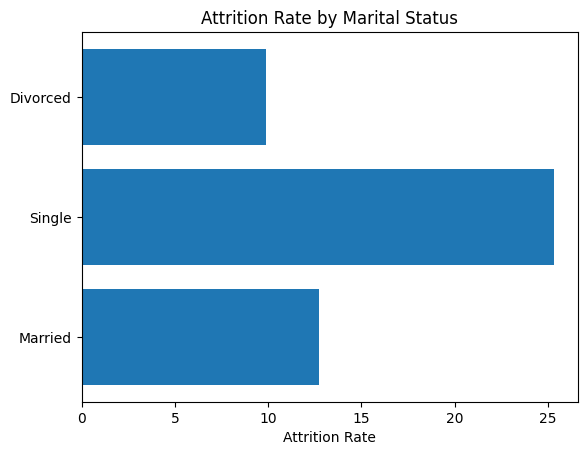

In [680]:
plt.barh(list(status.keys()), list(status.values()))
plt.xlabel('Attrition Rate')
plt.title('Attrition Rate by Marital Status')



BUSINESS TRAVEL EXPLO
---
>

In [681]:
BusinessTravel = ['BusinessTravel']
travel_attrition=Apercentage(df_all,BusinessTravel)
travel_attrition

{'Travel_Rarely': 15.077023926581449,
 'Travel_Frequently': 24.598269468479607,
 'Non-Travel': 8.181818181818182}

Text(0.5, 1.0, 'Attrition Rate by Travel Frequency')

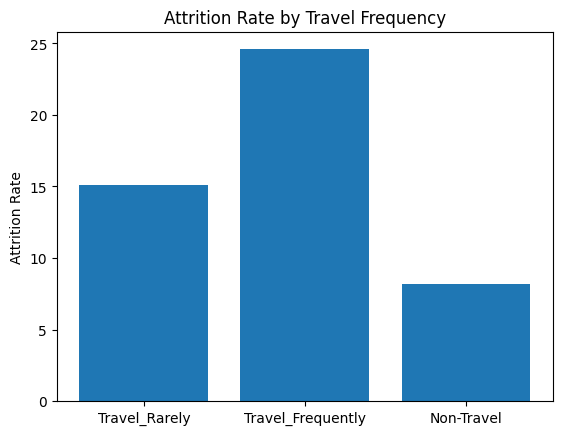

In [682]:
plt.bar(list(travel_attrition.keys()), list(travel_attrition.values()))
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Travel Frequency')


ENVIRONMENT SATISFACTION EXPLO

In [683]:
EnvironmentSatisfaction = ['EnvironmentSatisfaction']
Apercentage(df_general_explo,EnvironmentSatisfaction)


{3.0: 13.834586466165414,
 2.0: 15.147928994082841,
 4.0: 13.419257012888552,
 1.0: 25.45018007202881}

In [684]:
JobSatisfaction = ['JobSatisfaction']
Apercentage(df_general_explo,JobSatisfaction)



{4.0: 11.400894187779434,
 2.0: 16.50602409638554,
 1.0: 22.91421856639248,
 3.0: 16.56441717791411}

WORK LIFE BALANCE

In [685]:
WorkLifeBalance = ['WorkLifeBalance']
Apercentage(df_general_explo,WorkLifeBalance)

{2.0: 16.55104063429138,
 4.0: 17.96008869179601,
 1.0: 31.223628691983123,
 3.0: 14.4106463878327}

In [686]:
yes_counts_sales = df_general_explo[df_general_explo['JobRole'] == 'Sales Executive']['Attrition'].value_counts().get('Yes', 0)
counts_sales = df_general_explo[df_general_explo['JobRole'] == 'Sales Executive']['Attrition'].count()
Percentage_of_Attrition_sales=yes_counts_sales/counts_sales *100
Percentage_of_Attrition_sales

16.89259645464025

In [687]:
df_general_explo['Department'].value_counts()

Department
Research & Development    2824
Sales                     1315
Human Resources            188
Name: count, dtype: int64

In [688]:
df_general_explo['JobRole'].value_counts()

JobRole
Sales Executive              959
Research Scientist           863
Laboratory Technician        760
Manufacturing Director       428
Healthcare Representative    381
Manager                      300
Sales Representative         244
Research Director            238
Human Resources              154
Name: count, dtype: int64

In [689]:
df_general_explo['MaritalStatus'].value_counts()

MaritalStatus
Married     1981
Single      1387
Divorced     959
Name: count, dtype: int64

KPI
---
>


In [690]:


nombre_departs = df_all['Attrition'].value_counts()['Yes']
nombre_employes_total = len(df_all)
taux_rotation_personnel = (nombre_departs / nombre_employes_total) * 100

taux_rotation_personnel


16.162790697674417

In [691]:

df_general_explo['DurationInPosition'] = df_general_explo['YearsAtCompany'] - df_general_explo['YearsSinceLastPromotion']


df_general_explo[['Attrition','YearsAtCompany', 'YearsSinceLastPromotion', 'DurationInPosition']]

,Attrition,YearsAtCompany,YearsSinceLastPromotion,DurationInPosition
0,No,1,0,1
1,Yes,5,1,4
2,No,5,0,5
3,No,8,7,1
4,No,6,0,6
...,...,...,...,...
4404,No,6,1,5
4405,No,3,0,3
4406,No,3,0,3
4407,No,4,1,3


In [692]:
df_all.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
TotalWorkingHours          0
AverageHoursPerDay         0
NumberOfDaysAbsent         0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [693]:
df_general_explo.groupby('JobRole')['JobSatisfaction'].mean()


JobRole
Healthcare Representative    2.721785
Human Resources              3.006494
Laboratory Technician        2.689474
Manager                      2.720000
Manufacturing Director       2.782710
Research Director            2.852941
Research Scientist           2.674392
Sales Executive              2.720542
Sales Representative         2.639344
Name: JobSatisfaction, dtype: float64

EXPLO OVERTIME
---
>

In [694]:
Overtime = df_all[df_all['AverageHoursPerDay'] > 480]
Overtime

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,6,Female,4,...,7,7,153412,614.0,12,3,3,3.0,2.0,2.0
10,45,No,Travel_Rarely,Research & Development,17,2,Medical,11,Male,2,...,4,10,121406,486.0,8,2,3,3.0,4.0,3.0
11,55,No,Travel_Rarely,Research & Development,14,4,Life Sciences,13,Female,1,...,4,13,127702,511.0,20,3,3,4.0,1.0,3.0
12,47,Yes,Non-Travel,Research & Development,1,1,Medical,14,Male,1,...,9,9,132434,530.0,14,2,3,1.0,2.0,2.0
16,37,No,Non-Travel,Research & Development,1,3,Medical,18,Male,2,...,0,2,162469,650.0,3,3,3,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,52,No,Non-Travel,Research & Development,2,3,Technical Degree,4390,Male,1,...,15,12,133230,533.0,5,2,3,1.0,3.0,4.0
4283,32,Yes,Travel_Rarely,Sales,23,1,Life Sciences,4392,Male,3,...,1,2,150820,603.0,9,3,3,4.0,3.0,1.0
4292,45,No,Travel_Frequently,Sales,21,1,Marketing,4402,Male,3,...,0,2,121294,485.0,5,2,3,1.0,3.0,3.0
4296,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,...,0,2,128538,514.0,6,3,3,4.0,1.0,3.0


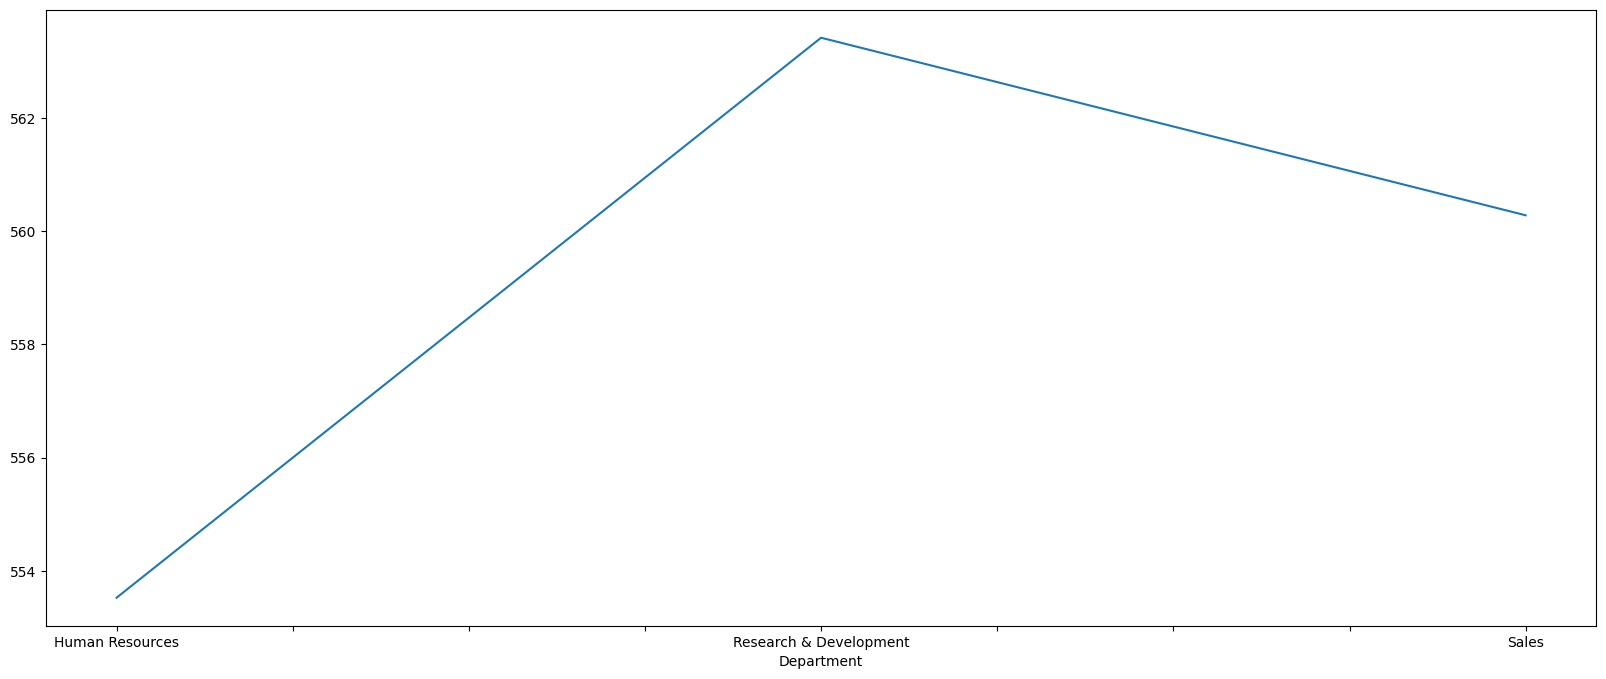

In [695]:
plt.figure(figsize=(20,8))
supp_department = Overtime.groupby('Department')['AverageHoursPerDay'].mean().plot()


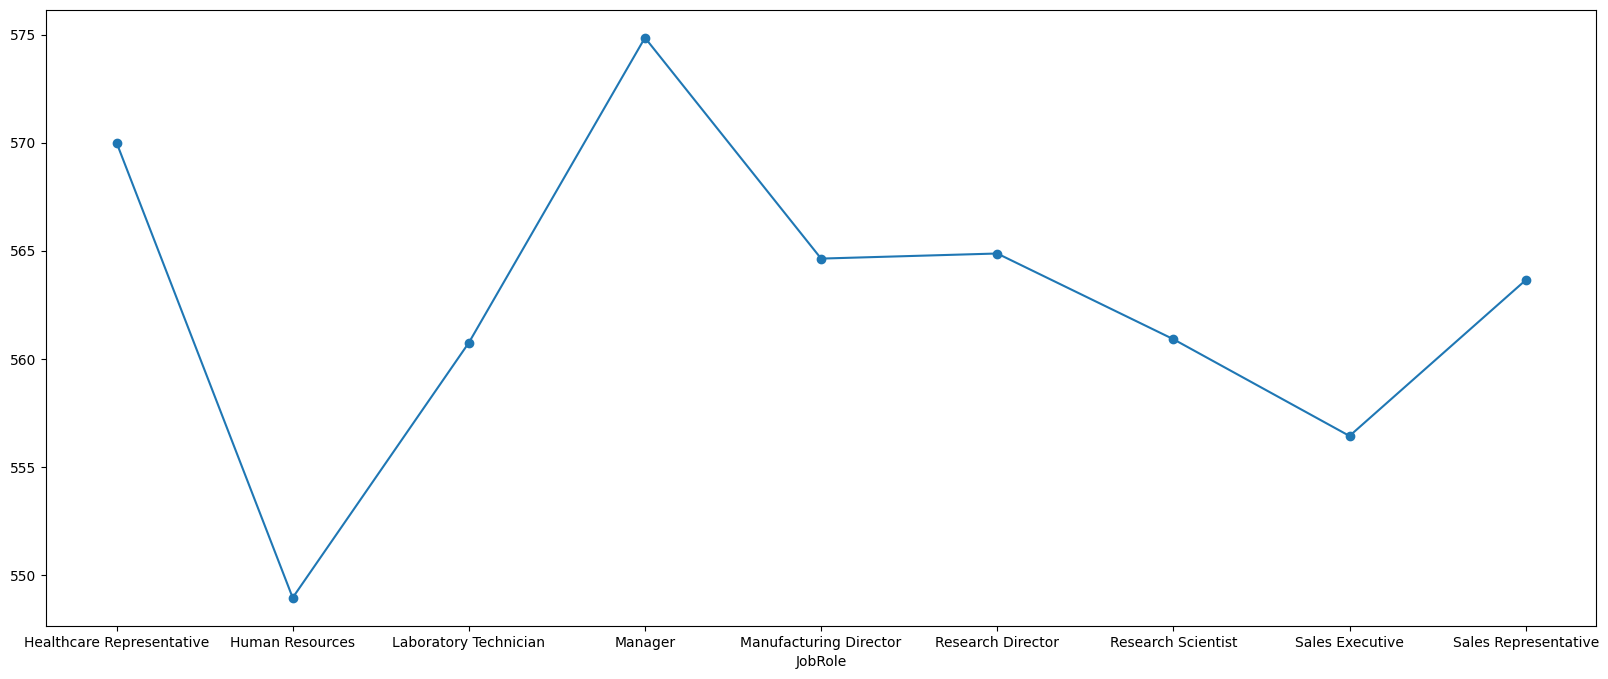

In [696]:
plt.figure(figsize=(20,8))
supp_jobrole = Overtime.groupby('JobRole')['AverageHoursPerDay'].mean().plot(kind='line', marker='o')


In [697]:
print(Overtime.groupby('Department')['AverageHoursPerDay'].mean())

Department
Human Resources           553.525424
Research & Development    563.418157
Sales                     560.281553
Name: AverageHoursPerDay, dtype: float64


In [698]:
df_all[df_all['AverageHoursPerDay'] > 480].count()/ df_all.count() *100


Age                        25.465116
Attrition                  25.465116
BusinessTravel             25.465116
Department                 25.465116
DistanceFromHome           25.465116
Education                  25.465116
EducationField             25.465116
EmployeeID                 25.465116
Gender                     25.465116
JobLevel                   25.465116
JobRole                    25.465116
MaritalStatus              25.465116
MonthlyIncome              25.465116
NumCompaniesWorked         25.465116
PercentSalaryHike          25.465116
StockOptionLevel           25.465116
TotalWorkingYears          25.465116
TrainingTimesLastYear      25.465116
YearsAtCompany             25.465116
YearsSinceLastPromotion    25.465116
YearsWithCurrManager       25.465116
TotalWorkingHours          25.465116
AverageHoursPerDay         25.465116
NumberOfDaysAbsent         25.465116
JobInvolvement             25.465116
PerformanceRating          25.465116
EnvironmentSatisfaction    25.465116
J

In [699]:
percentage = df_all[df_all['AverageHoursPerDay'] > 480].count() / df_all.count()
print(percentage)

Age                        0.254651
Attrition                  0.254651
BusinessTravel             0.254651
Department                 0.254651
DistanceFromHome           0.254651
Education                  0.254651
EducationField             0.254651
EmployeeID                 0.254651
Gender                     0.254651
JobLevel                   0.254651
JobRole                    0.254651
MaritalStatus              0.254651
MonthlyIncome              0.254651
NumCompaniesWorked         0.254651
PercentSalaryHike          0.254651
StockOptionLevel           0.254651
TotalWorkingYears          0.254651
TrainingTimesLastYear      0.254651
YearsAtCompany             0.254651
YearsSinceLastPromotion    0.254651
YearsWithCurrManager       0.254651
TotalWorkingHours          0.254651
AverageHoursPerDay         0.254651
NumberOfDaysAbsent         0.254651
JobInvolvement             0.254651
PerformanceRating          0.254651
EnvironmentSatisfaction    0.254651
JobSatisfaction            0

In [700]:
yes_counts_overtimers=df_all[df_all['AverageHoursPerDay'] > 480]['Attrition'].value_counts().get('Yes', 0)
count_overtimers = df_all[df_all['AverageHoursPerDay'] > 480]['Attrition'].count()
Attrition_rate_overtimers=yes_counts_overtimers/count_overtimers *100
Attrition_rate_overtimers

29.497716894977167

JOB SATISFACTION FOR OVERTIMERS
---
>

<Axes: xlabel='JobRole'>

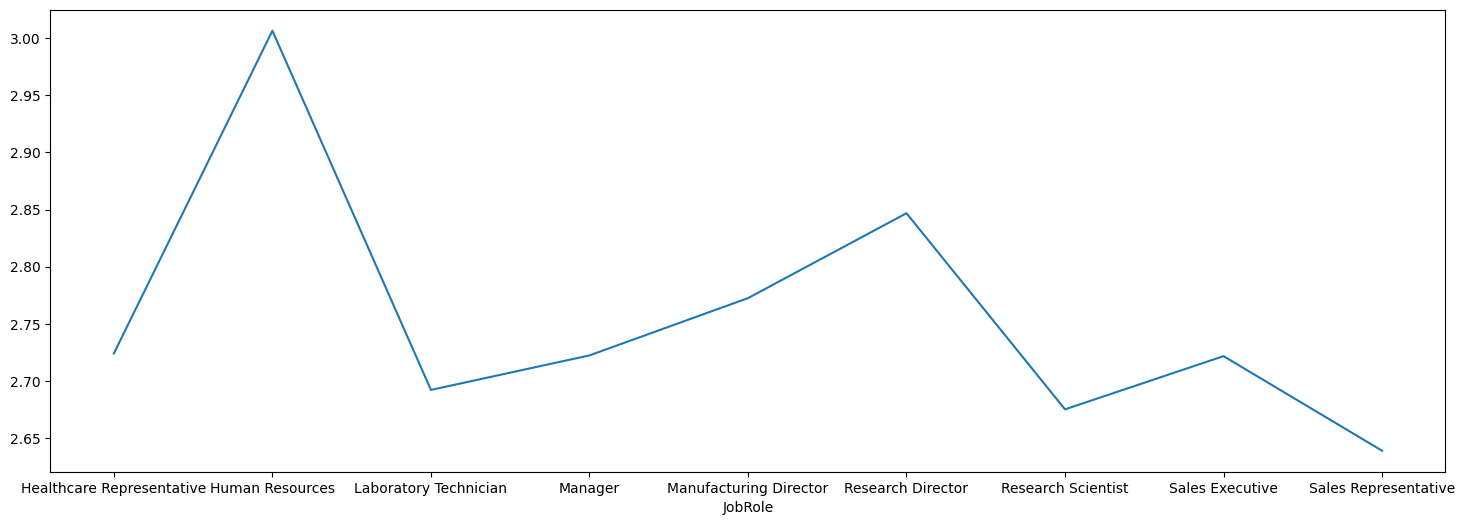

In [701]:
plt.figure(figsize=(18,6))
df_all.groupby('JobRole')['JobSatisfaction'].mean().plot()

<Axes: xlabel='Department'>

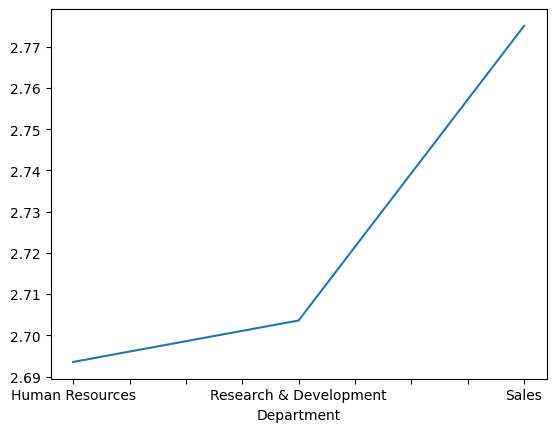

In [702]:
df_all.groupby('Department')['JobSatisfaction'].mean().plot()

WORKLIFE BALANCE

<Axes: xlabel='Department'>

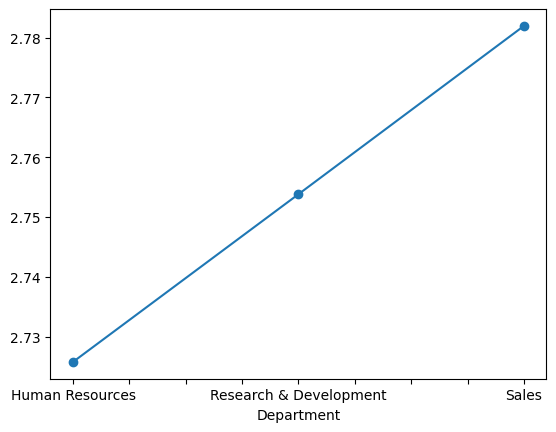

In [703]:
df_all.groupby('Department')['WorkLifeBalance'].mean().plot(marker='o')

<Axes: xlabel='JobRole'>

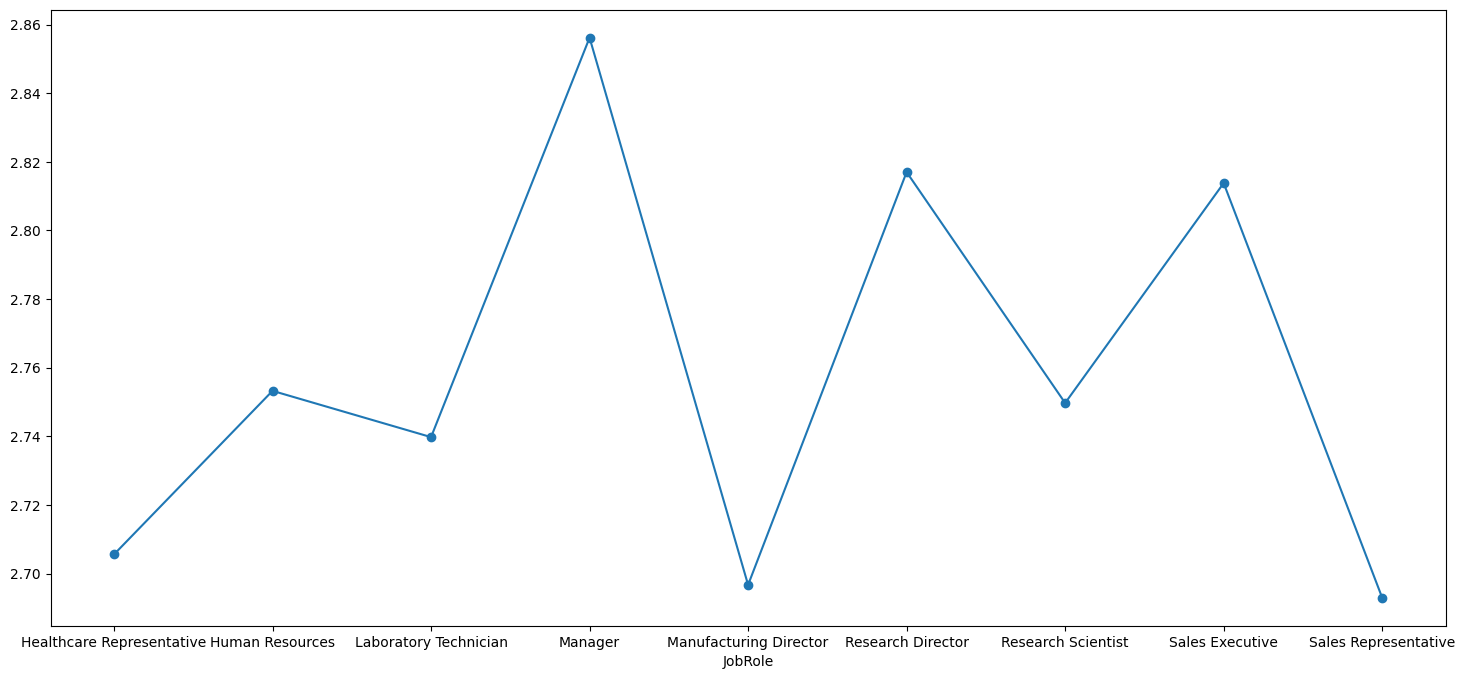

In [704]:
plt.figure(figsize=(18,8))
df_all.groupby('JobRole')['WorkLifeBalance'].mean().plot(marker='o')

EXPLO BUSINESS TRAVEL (DRAFT)
---
>

In [705]:
df_general_explo['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        3070
Travel_Frequently     815
Non-Travel            442
Name: count, dtype: int64

In [706]:
yes_counts_travel_frequently = df_general_explo[df_general_explo['BusinessTravel'] == 'Travel_Frequently']['Attrition'].value_counts().get('Yes', 0)
counts_travel_frequently = df_general_explo[df_general_explo['BusinessTravel'] == 'Travel_Frequently']['Attrition'].count()
Percentage_of_Attrition=yes_counts_travel_frequently/counts_travel_frequently *100
Percentage_of_Attrition

24.785276073619634

In [707]:
yes_counts_travel_frequently2 = df_general_explo[df_general_explo['BusinessTravel'] == 'Non-Travel']['Attrition'].value_counts().get('Yes', 0)
counts_travel_frequently2 = df_general_explo[df_general_explo['BusinessTravel'] == 'Non-Travel']['Attrition'].count()
Percentage_of_Attrition2=yes_counts_travel_frequently2/counts_travel_frequently2 *100
Percentage_of_Attrition2

8.144796380090497

In [708]:
yes_counts_travel_frequently3 = df_general_explo[df_general_explo['BusinessTravel'] == 'Travel_Rarely']['Attrition'].value_counts().get('Yes', 0)
counts_travel_frequently3 = df_general_explo[df_general_explo['BusinessTravel'] == 'Travel_Rarely']['Attrition'].count()
Percentage_of_Attrition3=yes_counts_travel_frequently3/counts_travel_frequently3 *100
Percentage_of_Attrition3

15.081433224755699

In [709]:
df_general_explo.groupby('BusinessTravel')['Attrition'].value_counts()


BusinessTravel     Attrition
Non-Travel         No            406
                   Yes            36
Travel_Frequently  No            613
                   Yes           202
Travel_Rarely      No           2607
                   Yes           463
Name: count, dtype: int64

EXPLO FEATURES
---
>

In [710]:
df_all.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
TotalWorkingHours            int64
AverageHoursPerDay         float64
NumberOfDaysAbsent           int64
JobInvolvement               int64
PerformanceRating            int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance     

In [711]:
no_numerical_features.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,0,2,2,1,Female,0,1
1,1,1,1,1,Female,6,2
2,0,1,1,4,Male,7,1
3,0,0,1,1,Male,1,1
4,0,2,1,3,Male,7,2


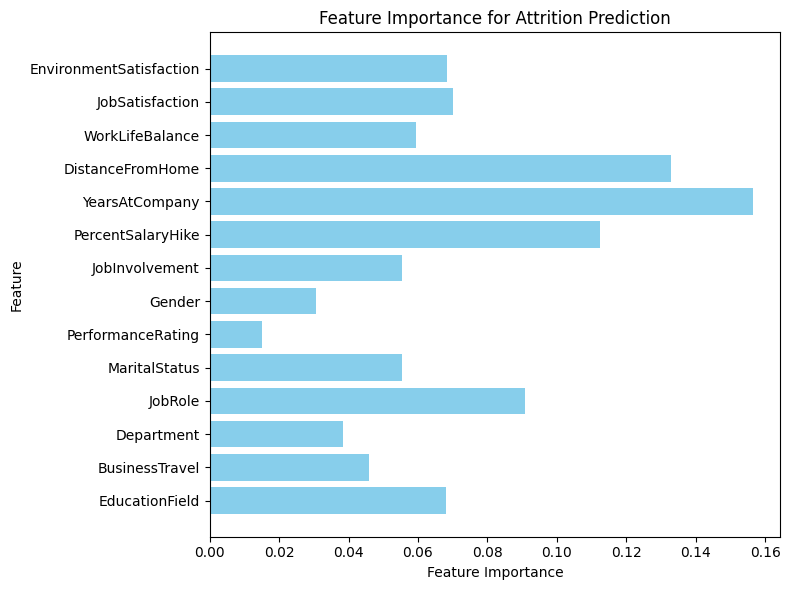

In [733]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = final[["EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance","DistanceFromHome",'YearsAtCompany','PercentSalaryHike','JobInvolvement','Gender', 'PerformanceRating','MaritalStatus','JobRole','Department','BusinessTravel','EducationField']]
y = final["Attrition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_

plt.figure(figsize=(8,6))
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for Attrition Prediction")
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()

In [734]:
accuracy = model.score(X_test, y_test)
accuracy

0.9825581395348837

In [713]:
new_data_selected = final[['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'DistanceFromHome', 'YearsAtCompany', 'PercentSalaryHike', 'JobInvolvement', 'PerformanceRating', 'MaritalStatus', 'JobRole', 'Department', 'BusinessTravel', 'EducationField']]


In [714]:
predictions = model.predict(new_data_selected)
predictions

array([0, 1, 0, ..., 0, 0, 0])

In [715]:
predictions_translated = ["Yes" if pred == 1 else "No" for pred in predictions]


In [716]:
EmployeeID=df_all
predictions_df = pd.DataFrame(predictions_translated, columns=['Prediction'])
final_df = pd.concat([EmployeeID, predictions_df], axis=1)
final_df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Prediction
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,0,102530,410.0,17,3,3,3.0,4.0,2.0,No
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,4,109189,437.0,13,2,4,3.0,2.0,4.0,Yes
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,3,101714,407.0,7,3,3,2.0,2.0,1.0,No
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,5,101316,405.0,14,2,3,4.0,4.0,3.0,No
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,4,117578,470.0,4,3,3,4.0,1.0,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,29,No,Travel_Rarely,Sales,4,3,Other,4405,Female,2,...,5,110604,442.0,6,2,3,3.0,4.0,3.0,No
4296,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,...,2,128538,514.0,6,3,3,4.0,1.0,3.0,No
4297,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,...,2,92387,370.0,8,2,3,4.0,4.0,3.0,No
4298,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,...,2,111104,444.0,18,3,4,1.0,3.0,3.0,No


DF_ALL EXPLO, CORR, ETC...
---
>

In [717]:
df_all=pd.read_csv('/Users/kalou/Documents/GitHub/rh-analysis/archive/df_all.csv')

In [718]:
df_all.head(6)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingHours,AverageHoursPerDay,NumberOfDaysAbsent,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,0,0,102530,410.0,17,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,1,4,109189,437.0,13,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,0,3,101714,407.0,7,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,7,5,101316,405.0,14,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,0,4,117578,470.0,4,3,3,4.0,1.0,3.0
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,6,Female,4,...,7,7,153412,614.0,12,3,3,3.0,2.0,2.0


HEATMAP
---
>

In [719]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
lenc=LabelEncoder()
enc=OneHotEncoder()
scaler=StandardScaler()

numerical_features = df_all.select_dtypes(include='number')
no_numerical_features = df_all.select_dtypes(exclude='number')

scaled_num=scaler.fit_transform(numerical_features)

no_numerical_features['BusinessTravel']=lenc.fit_transform(no_numerical_features['BusinessTravel'])
no_numerical_features['Department']=lenc.fit_transform(no_numerical_features['Department'])
no_numerical_features['EducationField']=lenc.fit_transform(no_numerical_features['EducationField'])
no_numerical_features['JobRole']=lenc.fit_transform(no_numerical_features['JobRole'])
no_numerical_features['MaritalStatus']=lenc.fit_transform(no_numerical_features['MaritalStatus'])
no_numerical_features['Attrition']=lenc.fit_transform(no_numerical_features['Attrition'])
no_numerical_features['Gender']=lenc.fit_transform(no_numerical_features['Gender'])

df_scaled=pd.DataFrame(scaled_num, columns=numerical_features.columns)

final=pd.concat([no_numerical_features,df_scaled], axis=1)

final_corr=final.corr()


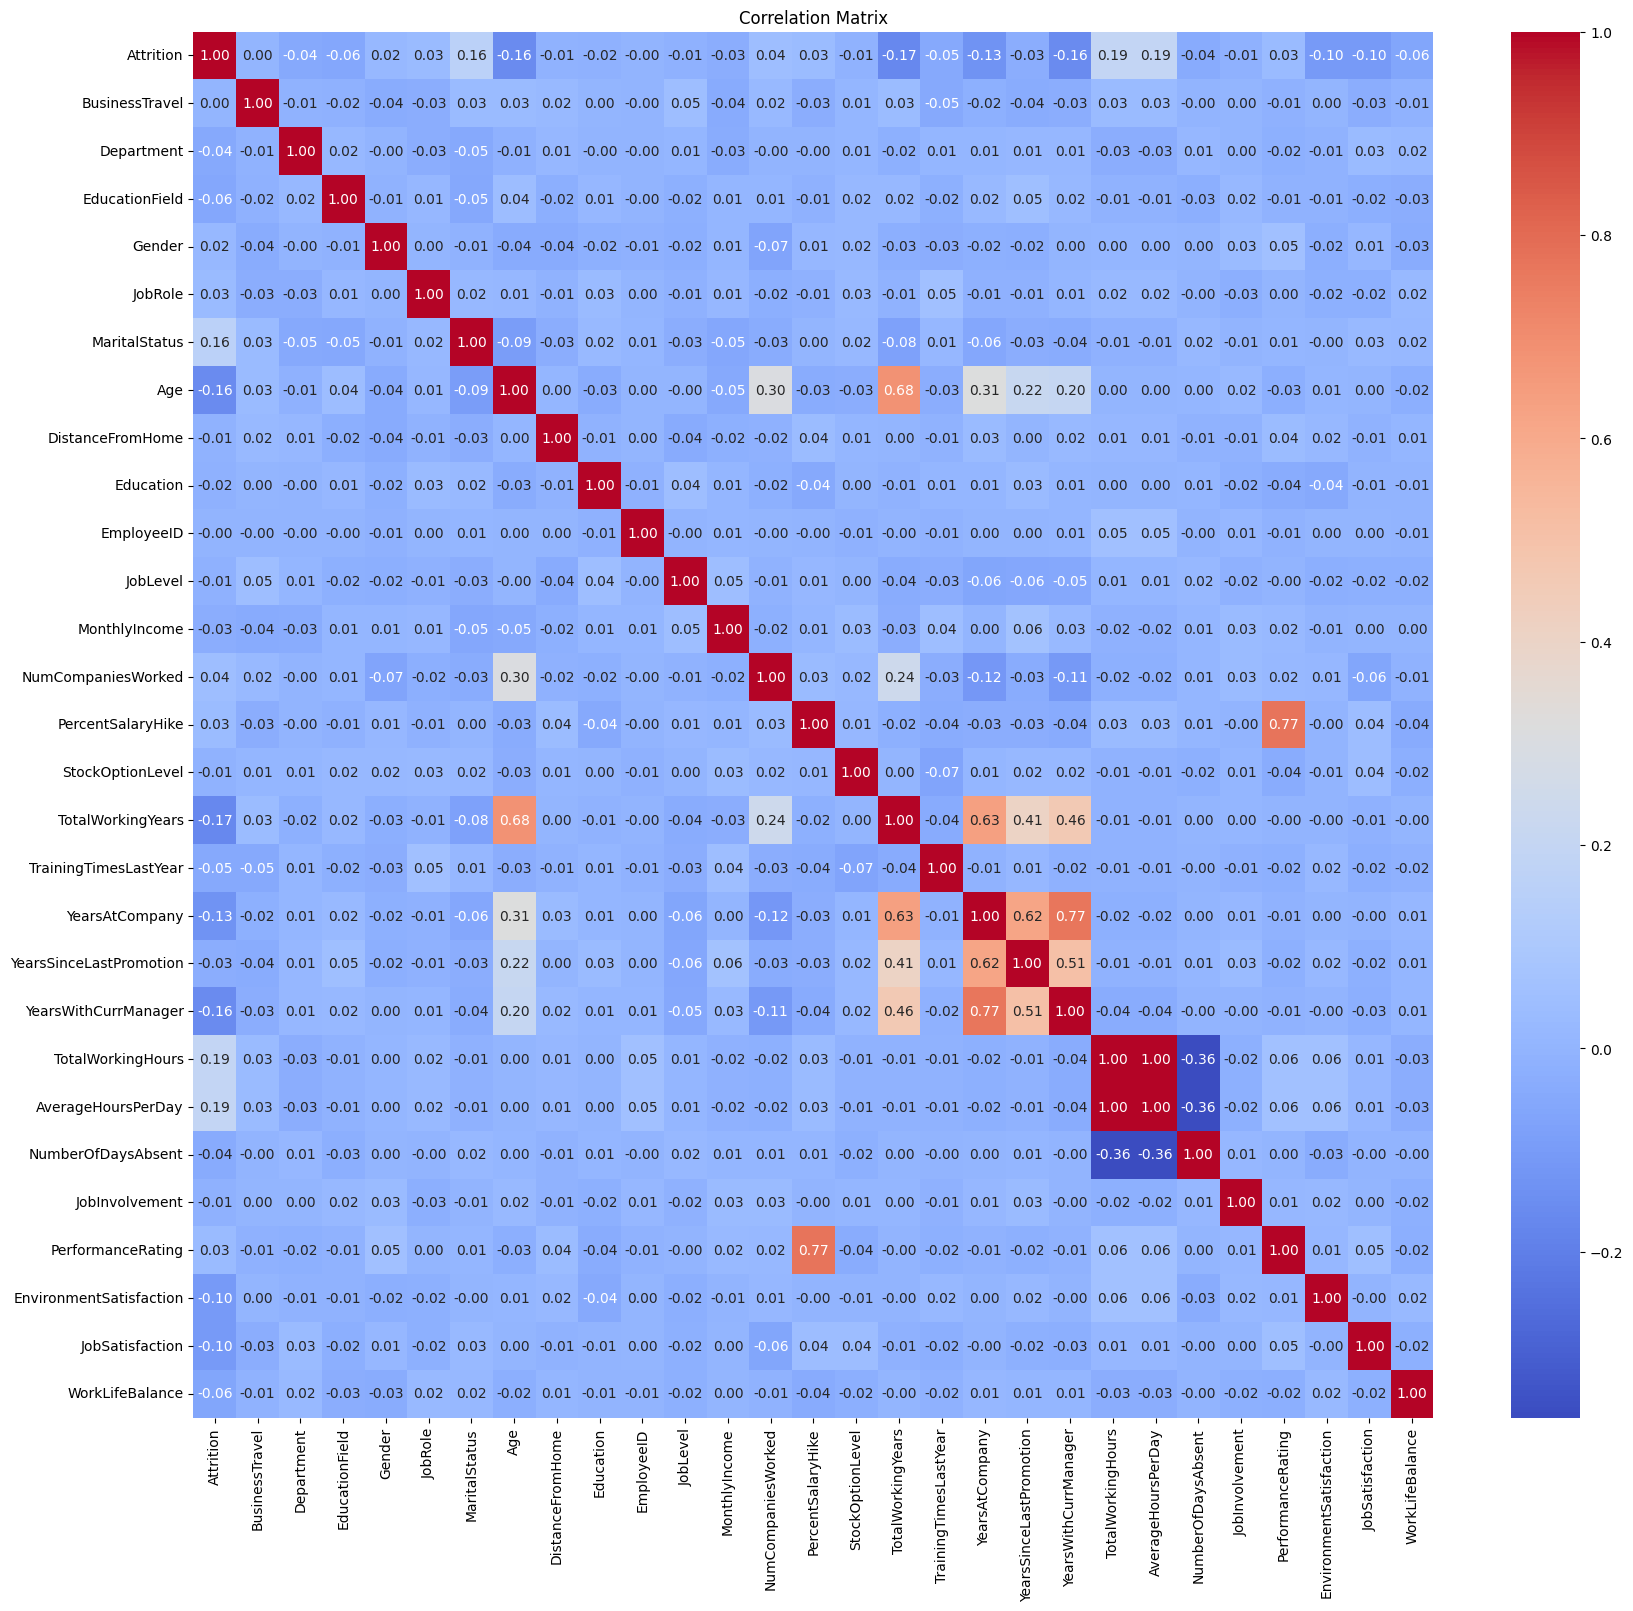

In [720]:
plt.figure(figsize=(20, 18))
sns.heatmap(final_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

EXPLO DISTANCE FROM HOME
---
>

Text(0.5, 0, 'Business Travel')

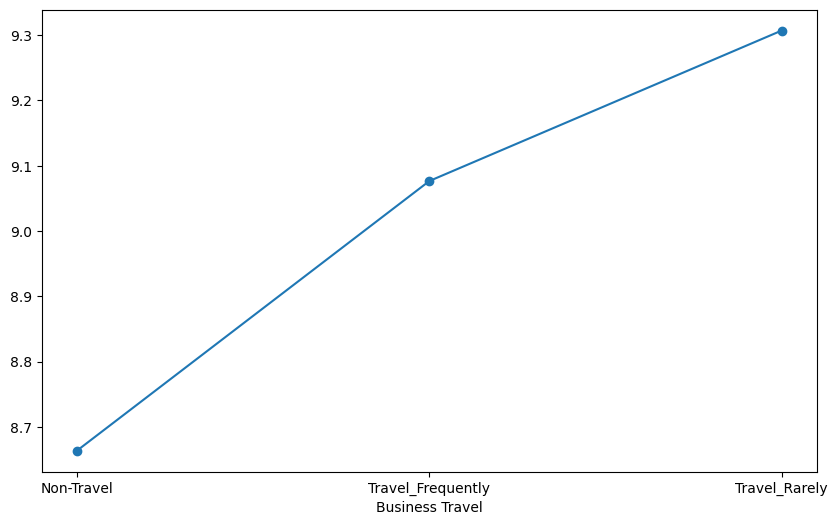

In [721]:
mean_distance = df_all.groupby('BusinessTravel')['DistanceFromHome'].mean()
mean_distance = mean_distance.reset_index()
plt.figure(figsize=(10, 6))
plt.plot(mean_distance['BusinessTravel'], mean_distance['DistanceFromHome'], marker='o')
plt.xlabel('Business Travel')

In [722]:
df_all.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'TotalWorkingHours', 'AverageHoursPerDay',
       'NumberOfDaysAbsent', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'],
      dtype='object')